In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('walmart_cleaned.csv')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


               Store      IsHoliday           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546       0.070358      44.260317   15981.258123   
std        12.785297       0.255750      30.492054   22711.183519   
min         1.000000       0.000000       1.000000   -4988.940000   
25%        11.000000       0.000000      18.000000    2079.650000   
50%        22.000000       0.000000      37.000000    7612.030000   
75%        33.000000       0.000000      74.000000   20205.852500   
max        45.000000       1.000000      99.000000  693099.360000   

         Temperature     Fuel_Price      MarkDown1      MarkDown2  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027    2590.074819     879.974298   
std        18.447931       0.458515    6052.385934    5084.538801   
min        -2.060000       2.472000       0.000000    -265.760000   
25%        46.680000       2.9330

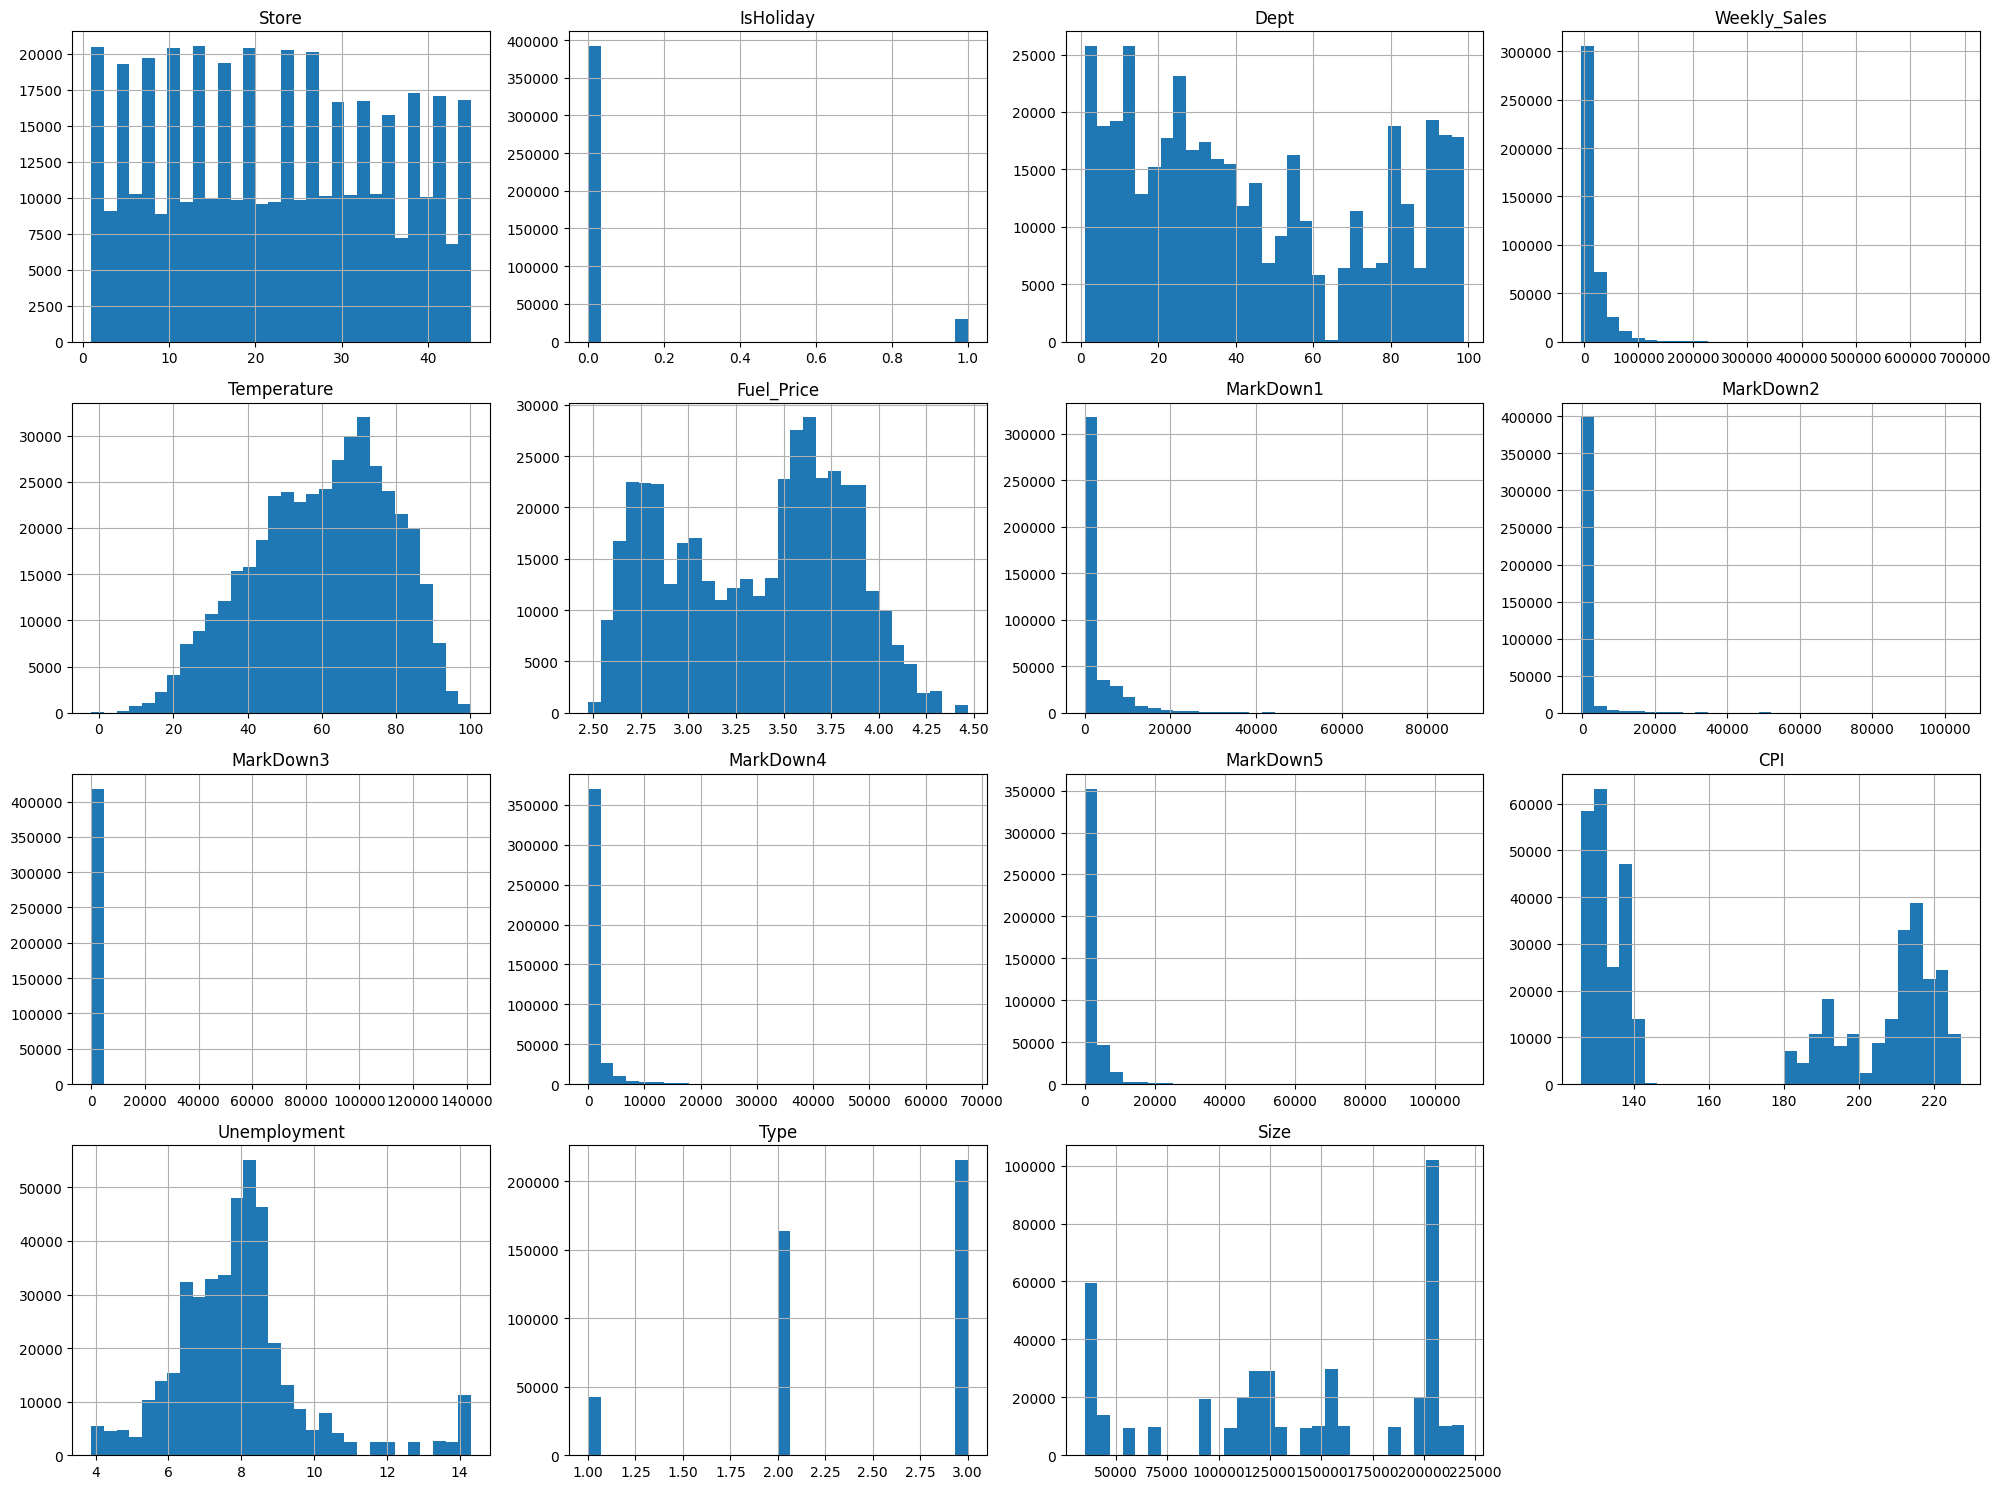

In [58]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Basic statistics and histograms
print(data.describe())
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

- **IsHoliday**: This binary feature indicates whether a given week is classified as a holiday week. As holidays are less frequent than regular weeks, we expect fewer holiday weeks compared to non-holiday weeks

- **CPI, Temperature, and Unemployment**: These columns generally show a near-normal distribution. Temperature is slightly skewed to the left, implying cooler temperatures are observed more often. CPI (Consumer Price Index) and Unemployment exhibit relatively balanced distributions

- **MarkDown1 to MarkDown5**:  These columns are primarily concentrated near zero, implying that markdowns (promotional discounts) are not consistently applied each week. This pattern suggests that markdowns are only present in certain weeks, while they remain unused in most others

- **Fuel_Price**: The distribution of fuel prices leans slightly to the right, suggesting that high fuel prices are less typical, with lower prices appearing more frequently

- **Weekly_Sales**: This column has a strong right skew, indicating that high sales volumes are uncommon, whereas lower sales values occur more frequently

- **Size and Type**:  Observations suggest that larger stores (represented by the "Size" column) and stores of type 3 (reflected in the "Type" column) dominate the dataset. This could imply that most stores in this data are larger and categorized as type 3

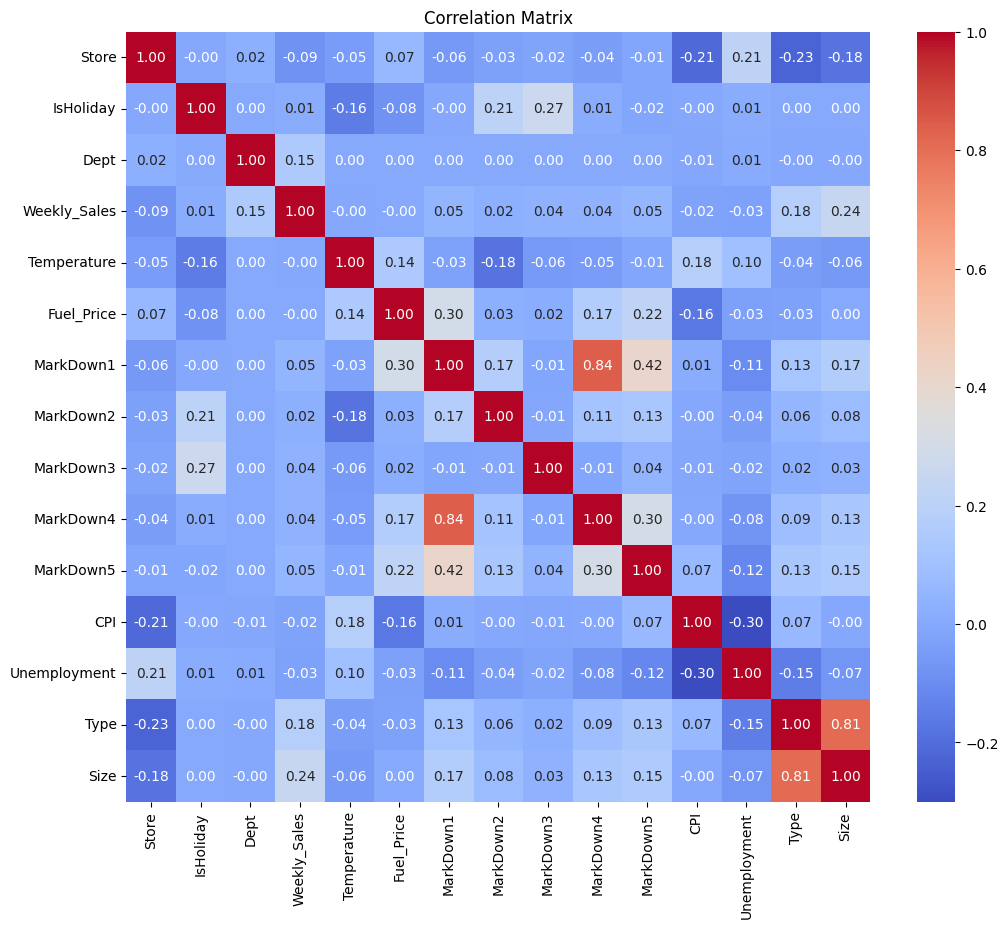

In [59]:
# Correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

- **Weekly_Sales and Size**: A positive correlation exists between `Weekly_Sales` and `Size`, indicating that larger stores generally report higher sales. This implies that store size can be a factor in sales performance

- **Weekly_Sales and Dept**: `Weekly_Sales` is also positively correlated with `Dept`, suggesting that certain store departments may generate higher sales than others

- **Weekly_Sales and Type**: There is a slight negative correlation between `Weekly_Sales` and `Type`, implying that specific store types might have lower sales, which points to an influence of store type on overall sales

- **Weekly_Sales and MarkDown features**: There is minimal to no correlation between `Weekly_Sales` and the `MarkDown` features, indicating that promotional markdowns may not significantly affect overall sales

- **Fuel_Price and MarkDown1, MarkDown4, and MarkDown5**: `Fuel_Price` shows a positive correlation with `MarkDown1`, `MarkDown4`, and `MarkDown5`, suggesting a possible association between fuel prices and these particular markdowns

- **CPI and Unemployment**: There is a negative correlation between `CPI` and `Unemployment`, which is consistent with the expectation that higher unemployment rates often coincide with lower consumer price index values, showing an inverse relationship between the two

- **Type and Size**: A strong negative correlation between `Type` and `Size` indicates that store type is linked to store size, suggesting that stores of different types are often of varying sizes

- **Temperature and other variables**: Temperature does not show a notable correlation with the other variables, indicating that it may not significantly influence sales or the other factors considered

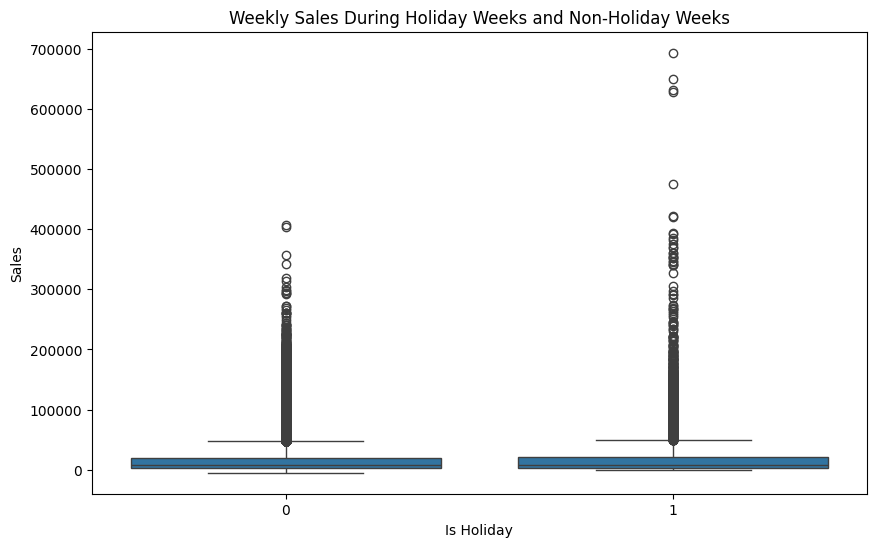

In [60]:
# Plot the distribution of sales during holiday weeks and non-holiday weeks
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsHoliday', y='Weekly_Sales', data=data)
plt.title('Weekly Sales During Holiday Weeks and Non-Holiday Weeks')
plt.xlabel('Is Holiday')
plt.ylabel('Sales')
plt.show()

The boxplot above illustrates the distribution of `Weekly_Sales` during holiday and non-holiday weeks. It shows that median sales tend to be slightly higher during holiday weeks, which aligns with the typical increase in consumer spending around holidays. However, sales vary widely in both cases, indicating considerable variability in weekly sales figures.

Next, we’ll move forward with various time series forecasting techniques to predict `Weekly_Sales`.

In [61]:
from scipy.stats import zscore

# Z-score for outlier detection
data['Sales_Zscore'] = zscore(data['Weekly_Sales'])
outliers = data[abs(data['Sales_Zscore']) > 3]  # Define threshold for outliers
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 8848


Using a Z-score threshold of 3, we identified 8,848 outliers in `Weekly_Sales`. This high count likely reflects the skewed, heavy-tailed nature of the sales data, given that Z-scores assume a normal distribution.


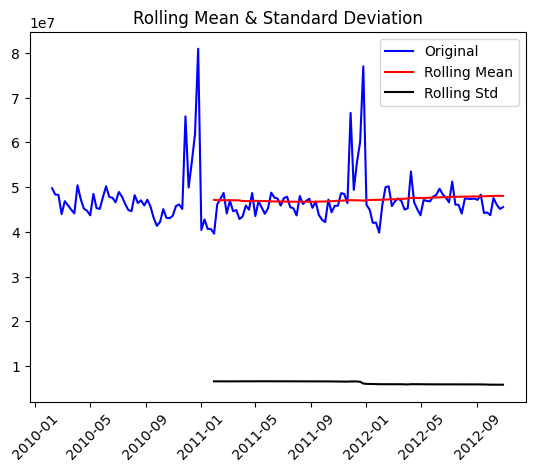

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [62]:
# Dickey-Fuller test for stationarity
from statsmodels.tsa.stattools import adfuller

# Create a time series dataset
ts_data = data['Weekly_Sales'].resample('W').sum()

# Define a function to test the stationarity of a time series
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling(window=52).std()
    # Plot rolling statistics
    fig, ax = plt.subplots()
    ax.plot(timeseries, color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    # Display the plot
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Test the stationarity of the time series data
test_stationarity(ts_data)

I aggregated `Weekly_Sales` across all stores and departments to create an overall time series dataset for forecasting.

The Dickey-Fuller test checks for stationarity by testing the null hypothesis that a time series has time-dependent structure. If the Test Statistic is lower than the Critical Value, we can reject this null hypothesis, suggesting the series is stationary.

Our results show a Test Statistic of -5.90, which is below the Critical Values at all confidence levels (1%, 5%, and 10%), allowing us to conclude that the series is stationary.

With a stationary series, we can now apply methods like ARIMA for forecasting.

**I went through the history of [Amazon's forecasting algorithm](https://www.amazon.science/latest-news/the-history-of-amazons-forecasting-algorithm) and implemented each type of algorithm to get a deeper understanding of how each algorithm works and understand how to implement them!**

We Start with Random Forest!

In [63]:
# Additional engineered features
data['Month'] = data.index.month
data['Size_Type'] = data['Size'] * data['Type']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

features = ['Size', 'Dept', 'IsHoliday', 'Type', 'CPI', 'Unemployment', 'Month', 'Size_Type']
X = data[features]
y = data['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f'Random Forest RMSE: {rmse_rf}, R2 Score: {r2_rf}, MAE: {mae_rf}')

Random Forest RMSE: 4444.676278068435, R2 Score: 0.9618998681459785, MAE: 1687.2429304089476


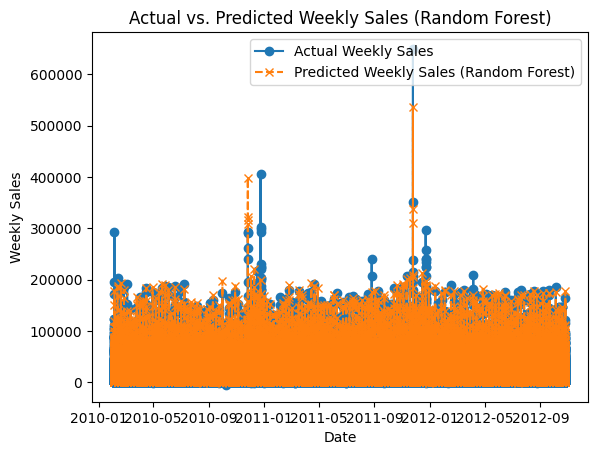

In [34]:
# Sort the indices to plot actual vs. predicted values in order
sorted_indices = np.argsort(y_test.index)

# Plot actual vs. predicted sales
plt.figure()
plt.plot(y_test.index[sorted_indices], y_test.values[sorted_indices], label="Actual Weekly Sales", marker='o')
plt.plot(y_test.index[sorted_indices], y_pred_rf[sorted_indices], label="Predicted Weekly Sales (Random Forest)", linestyle='--', marker='x')
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.title("Actual vs. Predicted Weekly Sales (Random Forest)")
plt.legend()
plt.show()

Then we move forward with Quantile Regression Forests which provides probabilistic forecasting, which is valuable for understanding different quantiles in forecasts

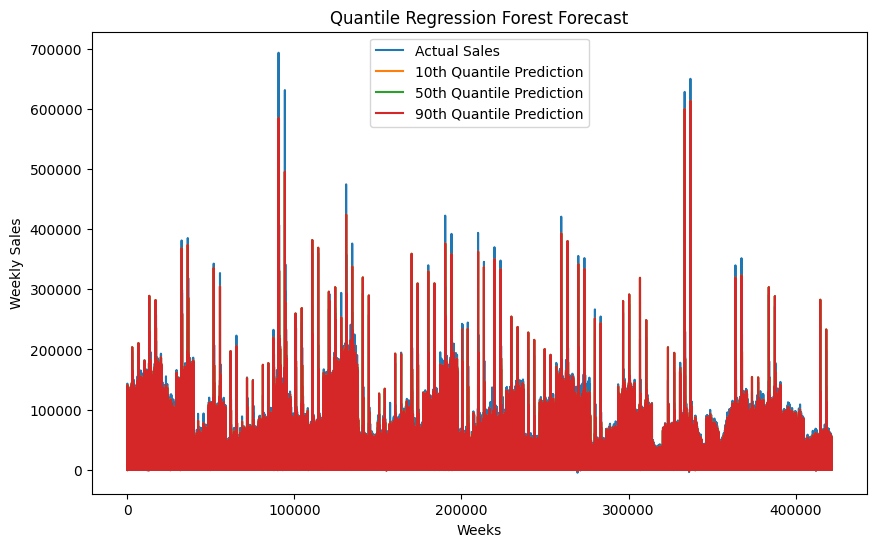

In [11]:
from sklearn.multioutput import MultiOutputRegressor

# Prepare data for SQRF
features = ['Size', 'Dept', 'IsHoliday', 'Type', 'CPI', 'Unemployment', 'Month', 'Size_Type']
X = data[features]
y = data[['Weekly_Sales']]  # Target variable

# Initialize Quantile Regression Forest
qrf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, min_samples_leaf=1))

# Fit model
qrf.fit(X, y)

# Predict the 10th, 50th, and 90th quantiles
quantiles = [0.1, 0.5, 0.9]
predictions = {quantile: qrf.predict(X) for quantile in quantiles}

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(y.values, label="Actual Sales")
for quantile, pred in predictions.items():
    plt.plot(pred, label=f"{int(quantile*100)}th Quantile Prediction")
plt.legend()
plt.xlabel("Weeks")
plt.ylabel("Weekly Sales")
plt.title("Quantile Regression Forest Forecast")
plt.show()


In [64]:
!pip install pmdarima

Next we implement ARIMA

In [65]:
# Aggregate weekly sales for a single series
ts_data = data['Weekly_Sales'].resample('W').sum()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=4769.760, Time=18.75 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4844.691, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=4804.381, Time=2.52 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=4797.927, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5462.768, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=inf, Time=6.64 sec
 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=4767.813, Time=8.55 sec
 ARIMA(2,0,2)(0,0,0)[52] intercept   : AIC=4830.548, Time=1.38 sec
 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=4769.801, Time=34.44 sec
 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=4773.352, Time=34.82 sec
 ARIMA(1,0,2)(1,0,0)[52] intercept   : AIC=4777.852, Time=3.10 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=4779.475, Time=5.25 sec
 ARIMA(3,0,2)(1,0,0)[52] intercept   : AIC=4769.157, Time=3.99 sec
 ARIMA(2,0,3)(1,0,0)[52] intercept   : AIC=4779.845, Time=2.97 sec
 ARIMA(1,0,1)(1,0,0)[

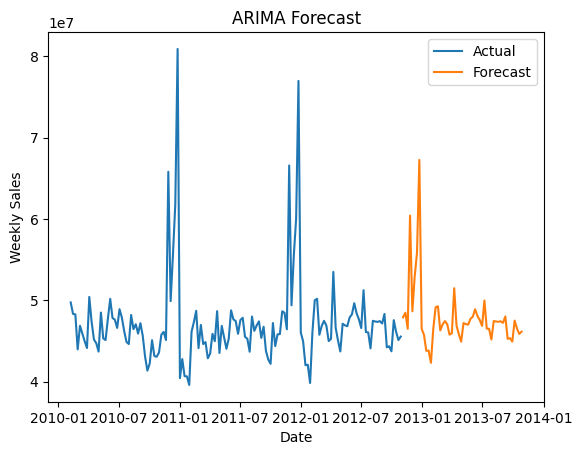

In [66]:
from pmdarima import auto_arima

# Auto ARIMA model selection
arima_model = auto_arima(ts_data, seasonal=True, m=52, trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(ts_data)

# Forecasting
forecast = arima_model.predict(n_periods=52)
forecast_series = pd.Series(forecast, index=pd.date_range(start=ts_data.index[-1], periods=53, freq='W')[1:])
plt.plot(ts_data, label='Actual')
plt.plot(forecast_series, label='Forecast')
plt.title("ARIMA Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


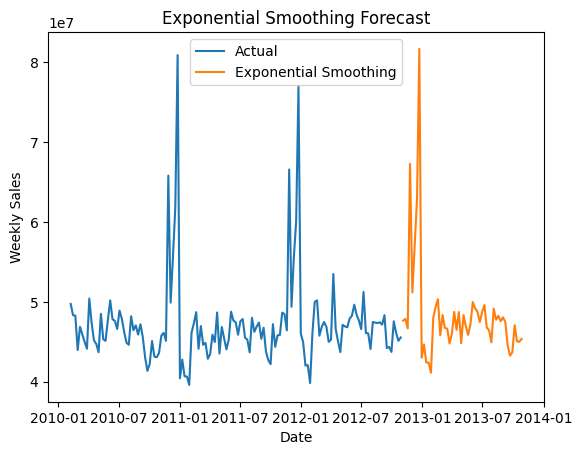

In [67]:
#Applying Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exp_smooth_model = ExponentialSmoothing(ts_data, seasonal='add', seasonal_periods=52).fit()
forecast_exp = exp_smooth_model.forecast(52)
forecast_exp_series = pd.Series(forecast_exp, index=forecast_series.index)

plt.plot(ts_data, label='Actual')
plt.plot(forecast_exp_series, label='Exponential Smoothing')
plt.title("Exponential Smoothing Forecast")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()


Since your data is weekly and has a seasonal component, We also try SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


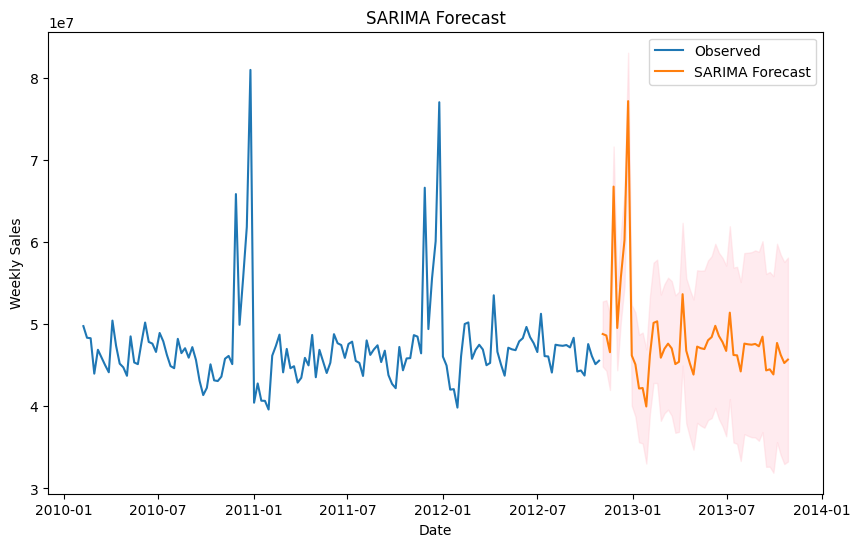

In [68]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model parameters
sarima_model = SARIMAX(ts_data, order=(0, 1, 1), seasonal_order=(0, 1, 2, 52), enforce_stationarity=False, enforce_invertibility=False)

# Fit SARIMA model
sarima_fit = sarima_model.fit(disp=False)

# Forecast
sarima_forecast = sarima_fit.get_forecast(steps=52)
sarima_pred_ci = sarima_forecast.conf_int()

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Observed')
plt.plot(sarima_forecast.predicted_mean, label='SARIMA Forecast')
plt.fill_between(sarima_pred_ci.index, sarima_pred_ci.iloc[:, 0], sarima_pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()


### Summary of Forecasting Models and Analysis

I experimented with multiple models for forecasting weekly sales data from walmart, each offering unique insights and strengths:

1. **SARIMA and ARIMA**: These models effectively captured overall sales trends and seasonality, providing interpretable, stable forecasts. However, they struggled with capturing sudden fluctuations, particularly around peak periods, which limits their effectiveness in dynamic environments with rapid demand shifts.

2. **Exponential Smoothing**: This approach produced smooth forecasts that aligned well with the general trend. While suitable for stable patterns, Exponential Smoothing is less effective in capturing irregular changes, making it better suited for steady, predictable data.

3. **Random Forest**: The Random Forest model demonstrated a strong ability to capture complex patterns within the data, including variability in weekly sales. However, it showed a tendency to overfit, resulting in noisy predictions around peak values. Random Forest is flexible but doesn’t inherently account for seasonality, which can affect its performance in time-series contexts.

4. **Quantile Regression Forest (QRF)**: The QRF model added a probabilistic layer by providing quantile predictions (e.g., 10th, 50th, 90th percentiles), allowing us to assess uncertainty and variability in forecasts. This is particularly useful in decision-making contexts where understanding potential extremes is valuable. However, like Random Forest, QRF can produce some noise and lacks explicit time dependency handling.

**Conclusion**: Each model brings distinct advantages to the table. SARIMA, ARIMA, and Exponential Smoothing offer stability and interpretability, making them well-suited for understanding general trends and seasonality. In contrast, Random Forest and Quantile Regression Forest (QRF) add flexibility and probabilistic insights, capturing complex patterns and providing valuable uncertainty estimates. Using SHAP further enhances model transparency, enabling a clearer view of how individual features influence sales predictions.

This project showcases my growth in demand forecasting since my previous interview and demonstrates my ability to apply a variety of forecasting techniques. I am enthusiastic about further developing my skills, especially in exploring advanced transformer models like Temporal Fusion Transformer (TFT) and MQTransformer, and I am eager to continue learning and contributing to Amazon’s innovations in this field.